In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
data = pd.read_csv('pro_contacts_adults.csv')

# Créer un objet Graph vide
graph = nx.Graph()

# Ajouter les nœuds pour les personnes
persons = data['adult_id'].unique()
graph.add_nodes_from(persons)

# Ajouter les arêtes pour les liens professionnels (même lieu de travail)
for _, row in data.iterrows():
    workplace_id = row['company_id']
    persons_at_workplace = data[data['company_id'] == workplace_id]['adult_id'].unique()
    
    # Créer des arêtes entre les personnes travaillant au même lieu
    for i in range(len(persons_at_workplace)):
        for j in range(i+1, len(persons_at_workplace)):
            person1 = persons_at_workplace[i]
            person2 = persons_at_workplace[j]
            graph.add_edge(person1, person2)

# Ajouter les arêtes pour les liens de résidence (même lieu de résidence)
for _, row in data.iterrows():
    household_id = row['household_id']
    persons_in_household = data[data['household_id'] == household_id]['adult_id'].unique()
    
    # Créer des arêtes entre les personnes habitant dans la même maison
    for i in range(len(persons_in_household)):
        for j in range(i+1, len(persons_in_household)):
            person1 = persons_in_household[i]
            person2 = persons_in_household[j]
            graph.add_edge(person1, person2)



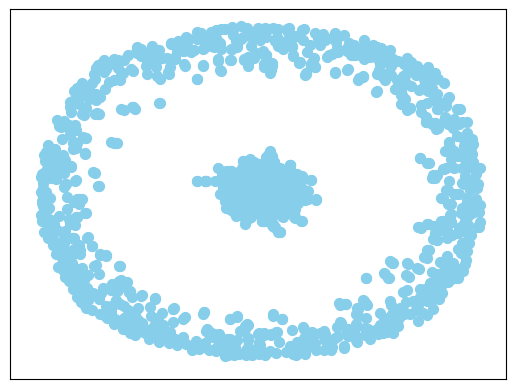

In [ ]:
# Visualiser le graphique
pos = nx.spring_layout(graph)  # Layout pour la visualisation
nx.draw_networkx(graph, pos, with_labels=False, node_color='skyblue', node_size=50, edge_color='gray')
plt.show()


In [ ]:
"""Pour identifier les entreprises ayant le plus d'influence, c'est-à-dire celles qui ont le plus
 grand nombre de liens avec d'autres nœuds 
 dans le graphique, on peut utiliser la mesure de centralité de degré.
On va pouvoir mesurer le nombre de liens (arêtes) qu'il a avec d'autres nœuds.
 Plus le degré d'un nœud est élevé, plus il est connecté et donc potentiellement plus influent."""

In [ ]:
#Calculer la centralité de degré pour chaque nœud (entreprise)
degree_centrality = nx.degree_centrality(graph)

# Trier les entreprises par leur centralité de degré (du plus élevé au plus bas)
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Sélectionner les 10 noeuds les plus influentes
top_10_nodes = sorted_nodes[:10]

# Créer une liste pandas avec les entreprises les plus influentes
top_10_nodes_df = pd.DataFrame({'nodes_id': top_10_nodes})

# Afficher la liste des 10 entreprises les plus influentes
print(top_10_nodes_df)

   nodes_id
0       713
1      2436
2      3788
3       864
4      1019
5      1834
6      2059
7      2354
8      5295
9      5349


In [ ]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
dataframe = pd.read_csv('pro_contacts_adults.csv')

# Filtrer les lignes dont adult_id correspond aux nœuds du DataFrame top_10_nodes_df
filtered_df = dataframe[dataframe['adult_id'].isin(top_10_nodes_df['nodes_id'])]

# Récupérer uniquement les colonnes 'adult_id' et 'job_cat' du DataFrame filtré
secteur_activite = filtered_df[['adult_id', 'job_cat']]

# Afficher le résultat
print(secteur_activite)


      adult_id         job_cat
713        713          Health
864        864  Transportation
1019      1019          Health
1834      1834     Indus_other
2059      2059  Transportation
2354      2354          Health
2436      2436      Indus_food
3788      3788          Health
5295      5295      Indus_food
5349      5349      Indus_food
